### 기술 지원 데이터는 종종 고객 경험 개선 기회에 대한 풍부한 정보 소스가 될 수 있습니다. 제품에 대한 고객의 문제가 적을수록 좋습니다. 고객이 최소한의 노력으로 기술적 과제를 신속하게 극복 할 수 있다면 더욱 좋습니다. 기술 지원 데이터를 분석하고 문제 유형, 문제 해결 시간 및 가장 적합한 지원 채널에 대한 기본적인 분석을 수행하겠습니다.

## technical_support_data.csv 파일을 통해, 비슷한 유형의 문제들을 도출하시오.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/technical_support_data.csv')

In [4]:
df.isna().sum()

PROBLEM_TYPE             0
no_of_cases              0
Avg_pending_calls        0
Avg_resol_time           0
recurrence_freq          0
Replace_percent          0
In_warranty_percent      0
Post_warranty_percent    0
dtype: int64

In [5]:
df.head(3)

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10


In [6]:
X = df.loc[ :  ,  'no_of_cases' :  ]

In [7]:
# 1. WCSS값을 구해서, 엘보우 메소드로 확인한다. 

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss = []
for k in range(1, 11) :
    kmeans = KMeans(n_clusters= k, random_state= 5)
    kmeans.fit(X)
    wcss.append( kmeans.inertia_ )
    

In [10]:
wcss

[666888.109626087,
 235660.1862872549,
 148952.65626166665,
 115863.02039166665,
 71210.34365476192,
 56290.83186666667,
 44666.429541666665,
 36204.21809166667,
 24910.04774166667,
 22522.54966666667]

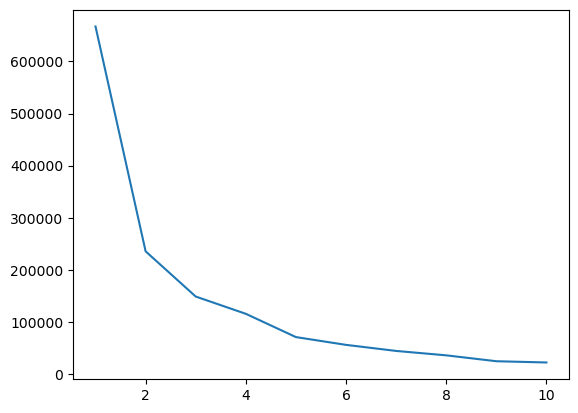

In [13]:
plt.plot( range(1,11) , wcss)
plt.show()

In [ ]:
# 2. k값을 정해서 그룹핑한다. => 클러스터링 한다. 

In [14]:
kmeans = KMeans(n_clusters= 5, random_state= 5)

In [16]:
y_pred = kmeans.fit_predict(X)

In [17]:
y_pred

array([2, 0, 4, 4, 4, 0, 0, 2, 1, 0, 0, 2, 2, 0, 3, 3, 1, 2, 0, 1, 4, 4,
       4], dtype=int32)

In [19]:
df['Group'] = y_pred

In [20]:
df

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,2
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,0
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,4
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,4
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,4
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,2
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,1
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0
